# Lecture 7

## RC Circuit

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import floor

In [2]:
floor(3.2)

3

In [3]:
def f(vin, vout, rc, t):
    # note that we combine R and C into rc
    return (vin-vout)/rc

# Be very clear about which variable is 'x' here

def Vin(t):
    floor_t = floor(t)
    if floor_t%2 == 0: # if even
        return 1
    else:
        return -1

# VECTORIZE so we an apply to an array (for testing)
Vin_vector = np.vectorize(Vin)
    
# This gives our driving function

In [4]:
# Test the driving function
dt = 0.01
tpoints = np.arange(0,10,dt)
vinpoints = Vin_vector(tpoints)

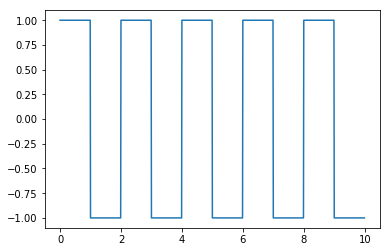

In [5]:
%matplotlib inline
plt.plot(tpoints, vinpoints)
plt.show()

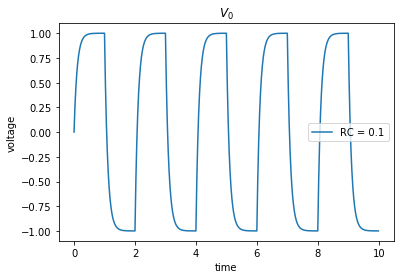

In [6]:
# Set up the problem
dt = 0.01
v0 = 0.0

tpoints = np.arange(0,10,dt)
vpoints = []
rc = 0.1
v = v0

# Runge-Kutta 2
for t in tpoints:
    vpoints.append(v)
    k1 = dt*f(Vin(t), v, rc, t)
    k2 = dt*f(Vin(t), v+0.5*k1, rc, t+0.5*t)
    v += k2
    
plt.plot(tpoints, vpoints, label = 'RC = 0.1')
plt.title("$V_0$")
plt.xlabel("time")
plt.ylabel("voltage")
plt.legend()
plt.show()

In [7]:
# We can automate this (copy paste)
# Could also have just written tpoints as input

def time_and_voltage(dt,rc):
    v = 0.0
    tpoints = np.arange(0, 10, dt)
    vpoints = []
    
    for t in tpoints:
        vpoints.append(v)
        k1 = dt*f(Vin(t), v, rc, t)
        k2 = dt*f(Vin(t), v+0.5*k1, rc, t+0.5*t)
        v += k2
        
    # return both arrays
    return tpoints, vpoints 

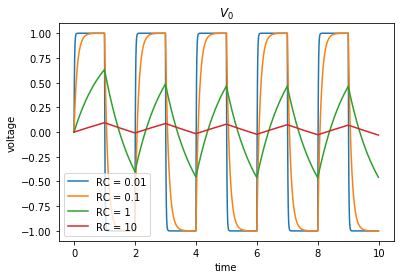

In [8]:
# Let's use this

tarray_of_arrays = []
varray_of_arrays = []

for RC in [0.01, 0.1, 1, 10]:
    t, v= time_and_voltage(0.01, RC)
    tarray_of_arrays.append(t)
    varray_of_arrays.append(v)
    
plt.plot(tarray_of_arrays[0], varray_of_arrays[0], label='RC = 0.01')
plt.plot(tarray_of_arrays[1], varray_of_arrays[1], label='RC = 0.1')
plt.plot(tarray_of_arrays[2], varray_of_arrays[2], label='RC = 1')
plt.plot(tarray_of_arrays[3], varray_of_arrays[3], label='RC = 10')

plt.title("$V_0$")
plt.xlabel("time")
plt.ylabel("voltage")
plt.legend()
plt.show()

See why this is called a "low pass filter" ?

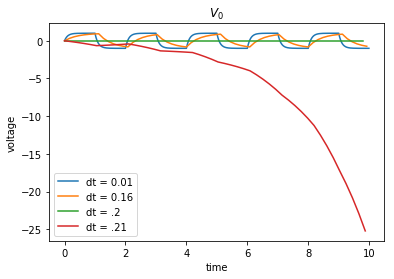

In [9]:
# What could go wrong? 

# Reset
tarray_of_arrays = []
varray_of_arrays = []

RC = 0.1 # fix RC, play with dt

for dt in [0.01, 0.16, .2, .21]:
    t, v = time_and_voltage(dt, RC)
    tarray_of_arrays.append(t)
    varray_of_arrays.append(v)
    
# copy pasta
plt.plot(tarray_of_arrays[0], varray_of_arrays[0], label='dt = 0.01')
plt.plot(tarray_of_arrays[1], varray_of_arrays[1], label='dt = 0.16')
plt.plot(tarray_of_arrays[2], varray_of_arrays[2], label='dt = .2')
plt.plot(tarray_of_arrays[3], varray_of_arrays[3], label='dt = .21')

plt.title("$V_0$")
plt.xlabel("time")
plt.ylabel("voltage")
plt.legend()
plt.show()

## Something Rotten with RK and Pendulum

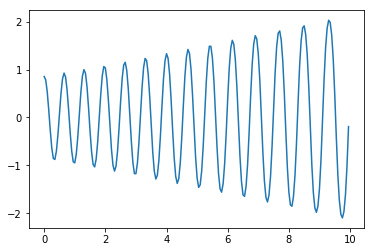

In [10]:
%matplotlib inline
from math import sin
from math import pi

g = 9.81
ell = 0.1 # don't write 'l' it looks like '1'

def f(theta, omega, t):
    return omega

def h(theta, omega, t):
    return -(g/ell)*sin(theta)

dt = .05
tpoints = np.arange(0, 10, dt)
thetas = []
omegas = []

theta = (49/360)*2*pi
omega = .5

for t in tpoints:
    thetas.append(theta)
    omegas.append(omega)
    k1theta = dt*f(theta, omega, t)
    k1omega = dt*h(theta, omega, t)
    
    k2theta = dt*f(theta+0.5*k1theta, omega + 0.5*k1omega, t+0.5*t)
    k2omega = dt*h(theta+0.5*k1theta, omega + 0.5*k1omega, t+0.5*t)
    
    theta += k2theta
    omega += k2omega
    
plt.plot(tpoints, thetas)